# Astero

* [code](https://github.com/iastro-pt/astero-py)
* []()
* [K2 Campaign 1](https://arxiv.org/pdf/1507.01827.pdf)
* [K2 Campaign 4](https://arxiv.org/pdf/1608.07290.pdf)

In [1]:
#import from .py in the same folder
#import astero

!pip install uncertainties

    100% |████████████████████████████████| 235kB 471kB/s ta 0:00:01
  Running setup.py bdist_wheel for uncertainties ... done
  Stored in directory: /home/jp/.cache/pip/wheels/69/c2/78/202aa638cd4141e8f2a3a979fa2eeee4d595bdbe94f23803b3
Successfully built uncertainties


In [2]:
!pip install kplr

  Running setup.py bdist_wheel for kplr ... done
  Stored in directory: /home/jp/.cache/pip/wheels/f6/59/1b/687190a3ce4b3675fc32fdea4a67ac57bead6256bf0ae08fe0
Successfully built kplr


From [Silva-Aguirre 2015](https://arxiv.org/pdf/1504.07992.pdf), [Kepler-409](http://www.openexoplanetcatalogue.com/planet/Kepler-409%20b/) is an asteroseismic star.

In [17]:
import kplr
kplr.__version__

'0.2.1'

In [ ]:
client = kplr.API()
# koi = client.koi(1925.01)
# # Get a list of light curve datasets.
# lcs = koi.get_light_curves(short_cadence=False)

In [10]:
#for Kepler-409
star = client.star(9955598)

In [15]:
lcs = star.get_light_curves(short_cadence=True)

# Loop over the datasets and read in the data.
time, flux, ferr, quality = [], [], [], []
for lc in lcs:
    with lc.open() as f:
        # The lightcurve data are in the first FITS HDU.
        hdu_data = f[1].data
        time.append(hdu_data["time"])
        flux.append(hdu_data["sap_flux"])
        ferr.append(hdu_data["sap_flux_err"])
        quality.append(hdu_data["sap_quality"])

In [18]:
import everest
everest.__version__

u'2.0.8'

From [Lund et al. 2016](https://arxiv.org/pdf/1608.07290.pdf) K2 C4, [EPIC 210444167](https://www.cfa.harvard.edu/~avanderb/k2c4/ep210444167.html) is an asteroseismic star.

In [19]:
star = everest.Everest(210444167)

INFO  [everest.user.DownloadFile()]: Downloading the file...
INFO  [everest.user.load_fits()]: Loading FITS file for 210444167.


INFO  [everest.user.plot()]: Plotting the light curve...


/home/jp/.local/lib/python2.7/site-packages/everest_pipeline-2.0.8-py2.7.egg/everest/user.py:628: RuntimeWarning: invalid value encountered in less
  for i in np.where(flux < ylim[0])[0]:
/home/jp/.local/lib/python2.7/site-packages/everest_pipeline-2.0.8-py2.7.egg/everest/user.py:644: RuntimeWarning: invalid value encountered in greater
  for i in np.where(flux > ylim[1])[0]:


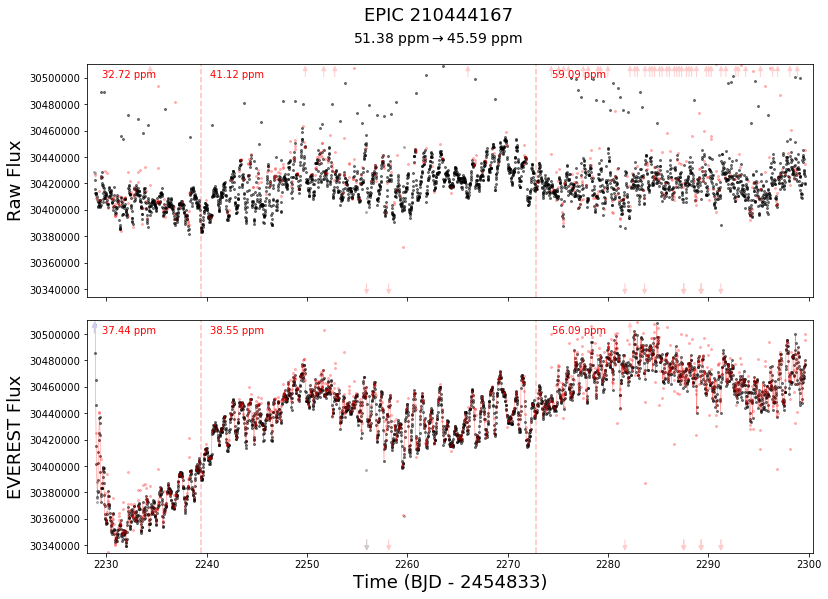

In [20]:
star.plot()

In [29]:
import pandas as pd

df = pd.DataFrame(star.flux, index=star.time, columns=['flux'])

In [30]:
df.head()

,flux
2228.800541,3.050543e+07
2228.820973,3.049543e+07
2228.841406,3.048594e+07
2228.861838,3.046665e+07
2228.882271,3.044133e+07


In [31]:
df.to_csv('EPIC 210444167.csv')

In [32]:
from freq_class import _astero
load = _astero
echelle = _astero.echelle
plotls = _astero.plotls
plotss = _astero.plotss
plotr = _astero.plotr
mesa_create_inlist = _astero.mesa_create_inlist

In [35]:
sun = load('EPIC 210444167.csv')

TypeError: __init__() takes at least 3 arguments (2 given)